[View in Colaboratory](https://colab.research.google.com/github/cdvel/face-recognition-notes/blob/master/live_example_ageitey_face_recognition.ipynb)

# Live example of ageitgey/face_recognition

The world's simplest facial recognition api for Python and the command line

In this example:

1. Detect face
2. Find face landmarks
3. Compare face similarities


*NOTE: assumes one face per image*

### Project repo

https://github.com/ageitgey/face_recognition

### Colaboratory file

https://colab.research.google.com/drive/1CwGmR3vcFnui3PWnqdIcGSjqMxfWSxt1#scrollTo=Ft_7vRlLEsPU

### Install pre-requisites and external libraries

Run once

In [0]:
!pip3 install numpy
!apt update
!apt install -y cmake

In [0]:
!pip3 install dlib
!pip3 install face_recognition

### Imports and download files

In [0]:
## Download tutorial images sax.jpg, prestige.jpg, love.jpg

import face_recognition
import urllib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image, ImageDraw

urls = [{"uri": "https://lastfm-img2.akamaized.net/i/u/770x0/97ec6cc676884410af3e69601176d4b3.jpg", "name": 'sax.jpg'},
        {"uri": "https://lastfm-img2.akamaized.net/i/u/770x0/89680f1cb16845a7b6e482e09e855c1c.jpg", "name": 'prestige.jpg'},
        {"uri": "https://lastfm-img2.akamaized.net/i/u/770x0/29555acae2ed44eea3882de43a606fd9.jpg", "name": 'love.jpg'}]


for url in urls:
  urllib.request.urlretrieve(url['uri'], url['name'])


### 1. Detect face

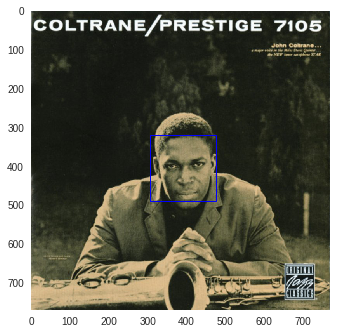

In [41]:
# return face location as (origin, width, height)
def find_face(image):
  loc = face_recognition.face_locations(image, model='cnn')[0]
  x, y = (15, 15)
  return {'origin': (loc[3] - x , loc[0] - y), 'width': loc[1] - loc[3] + x*2, 'height': loc[2] - loc[0] + y*2}


im = face_recognition.load_image_file("prestige.jpg")
locs = find_face(im)

fig,ax = plt.subplots(1)
ax.grid(False)
ax.imshow(im)
rect = patches.Rectangle(locs['origin'], locs['width'], locs['height'], linewidth=1,edgecolor='blue',facecolor='none')
ax.add_patch(rect)
plt.show()

### Find face landmarks

chin:	[(332, 396), (335, 415), (338, 434), (344, 452), (352, 469), (362, 484), (373, 498), (387, 508), (405, 510), (422, 506), (436, 494), (447, 478), (454, 461), (459, 442), (462, 423), (464, 403), (465, 384)]
left_eyebrow:	[(340, 391), (348, 384), (359, 381), (370, 383), (380, 387)]
right_eyebrow:	[(409, 385), (420, 380), (431, 377), (443, 377), (453, 382)]
nose_bridge:	[(395, 400), (396, 412), (396, 425), (396, 439)]
nose_tip:	[(383, 445), (390, 447), (398, 449), (406, 446), (414, 443)]
left_eye:	[(351, 401), (359, 397), (368, 397), (377, 403), (368, 405), (358, 405)]
right_eye:	[(416, 399), (424, 392), (434, 391), (442, 394), (435, 399), (426, 400)]
top_lip:	[(375, 470), (384, 468), (393, 466), (400, 468), (408, 465), (418, 465), (428, 466), (424, 468), (409, 472), (401, 474), (393, 474), (379, 471)]
bottom_lip:	[(428, 466), (420, 478), (411, 484), (402, 485), (394, 485), (384, 481), (375, 470), (379, 471), (393, 473), (401, 474), (409, 472), (424, 468)]


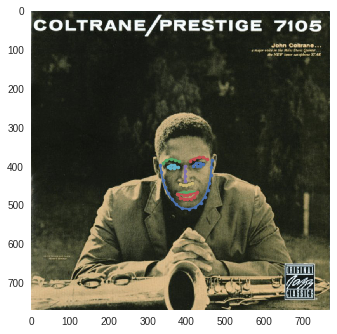

In [42]:
face_landmarks_list = face_recognition.face_landmarks(im)

with_landmarks = Image.fromarray(im)
fig2, ax2 = plt.subplots(1)
ax2.imshow(with_landmarks)
ax2.grid(False)
for facial_feature in face_landmarks_list[0].keys():
  print ("{}:\t{}".format(facial_feature, face_landmarks_list[0][facial_feature]))  
  plt.plot(*zip(*face_landmarks_list[0][facial_feature]), marker=".")

with_landmarks.show()
plt.show()

### Compare face similarities

These faces are SIMILAR with a distance of [0.51878345]


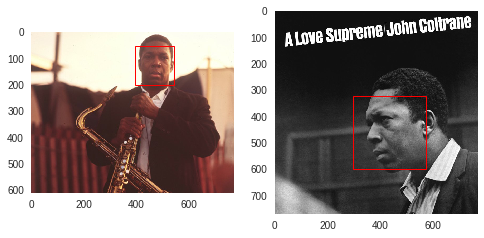

In [34]:
sax = face_recognition.load_image_file("sax.jpg")
love = face_recognition.load_image_file("love.jpg")

# find encodings
sax_encoding = face_recognition.face_encodings(sax)[0]
love_encoding = face_recognition.face_encodings(prestige)[0]

# compute similarity and encodings distance
similarity = "SIMILAR" if face_recognition.compare_faces([sax_encoding], love_encoding) else "NOT SIMILAR"
distance = face_recognition.face_distance([sax_encoding], love_encoding)

images = [sax, love]

f, axarr = plt.subplots(1, len(images))

for idx in range(0, len(images)):
  loc = find_face(images[idx]);
  axarr[idx].add_patch(patches.Rectangle(loc['origin'], loc['width'], loc['height'],linewidth=1,edgecolor='red',facecolor='none'))
  axarr[idx].imshow(images[idx])
  axarr[idx].grid(False)
  
print ("These faces are {} with a distance of {}".format(similarity, distance))